In [1]:




#this is my Pytorch notebook, the goals are to just play around with programming get familiar with it.
















import torch 
import numpy as np


In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6929, 0.3654],
        [0.5847, 0.2357]]) 



In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4449, 0.3414, 0.3260],
        [0.0217, 0.1896, 0.5319]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
#Attributes of a Tensor
#Tensor attributes describe their shape, datatype, and the device on which they are stored.

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")



Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [8]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [9]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [10]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [11]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [12]:
#Bridge with NumPy
#Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

#Tensor to NumPy array

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [13]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [14]:
#NumPy array to Tensor
n = np.ones(5)
t = torch.from_numpy(n)

In [15]:
#Changes in the NumPy array reflects in the tensor.
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")


t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



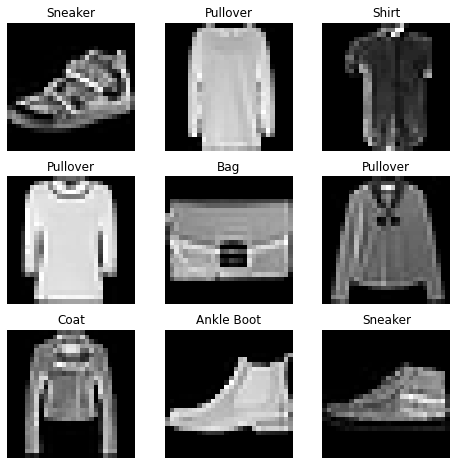

In [17]:
#Iterating and Visualizing the Dataset
#We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [18]:
#Creating a Custom Dataset for your files
#A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir, and their labels are stored separately in a CSV file annotations_file.

#In the next sections, we’ll break down what’s happening in each of these functions.

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
#__init__
#The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).

#The labels.csv file looks like:

tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9

def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
    
    
    
#__len__
#The __len__ function returns the number of samples in our dataset.

#Example:
def __len__(self):
    return len(self.img_labels)


#__getitem__
#The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, 
#converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label




In [19]:
#Preparing your data for training with DataLoaders
#The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

#DataLoader is an iterable that abstracts this complexity for us in an easy API.
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


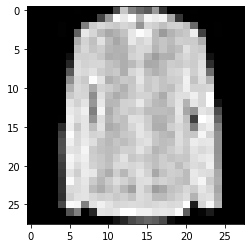

Label: 6


In [20]:
#Iterate through the DataLoader
#We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). 
#Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


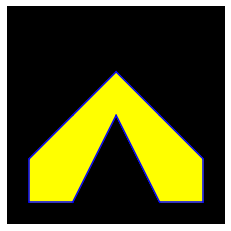

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D array to represent the image
image = np.zeros((500, 500, 3), dtype=np.uint8)

# Draw a butterfly shape on the image
x = np.array([0, 100, 200, 200, 100, 0, -100, -200, -200, -100, 0])
y = np.array([0, 200, 200, 100, 0, -100, 0, 100, 200, 200, 0])
x = x + 250
y = y + 250
for i in range(len(x) - 1):
    plt.plot(x[i:i+2], y[i:i+2], color='blue')

plt.fill(x, y, color='yellow')

# Show the image
plt.axis('off')
plt.imshow(image)
plt.show()


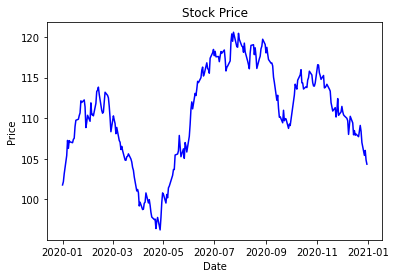

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random stock price data
np.random.seed(0)
dates = pd.date_range(start='1/1/2020', end='12/31/2020', freq='B')
price = 100 + np.cumsum(np.random.randn(len(dates)))

# Create a DataFrame to store the data
df = pd.DataFrame({'Date': dates, 'Price': price})

# Plot the stock price data
plt.plot(df['Date'], df['Price'], color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.show()


In [23]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [24]:
#ToTensor()
#ToTensor converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]

#Lambda Transforms
#Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter_ which assigns a value=1 on the index as given by the label y.

target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [25]:
#BUILD THE NEURAL NETWORK
#Neural networks comprise of layers/modules that perform operations on data. The torch.nn namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

#In the following sections, we’ll build a neural network to classify images in the FashionMNIST dataset.

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [26]:
#Get Device for Training
#We want to be able to train our model on a hardware accelerator like the GPU, if it is available. Let’s check to see if torch.cuda is available, else we continue to use the CPU.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [27]:
#Define the Class
#We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [28]:
#We create an instance of NeuralNetwork, and move it to the device, and print its structure.

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [29]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


In [30]:
#Model Layers
#Let’s break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

input_image = torch.rand(3,28,28)
print(input_image.size())


torch.Size([3, 28, 28])


In [31]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())


torch.Size([3, 784])


In [32]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [33]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.5113,  0.3631,  0.7111,  0.2440, -0.0635, -0.1665,  0.2889,  0.1047,
         -0.2018,  0.0506,  0.1745,  0.2493, -0.1778, -0.7004, -0.0610,  0.1325,
          0.4930, -0.2685,  0.2214,  0.6650],
        [ 0.2188,  0.4355,  0.5044,  0.4685, -0.1795, -0.2281,  0.6275,  0.4717,
         -0.3218,  0.0635,  0.5886,  0.1042, -0.4752, -0.9036,  0.3692,  0.2623,
          0.5542, -0.3254, -0.0490,  0.6194],
        [ 0.5126, -0.1165,  0.1716, -0.0363, -0.3202, -0.0029,  0.5075,  0.2315,
         -0.1342,  0.0061,  0.5905, -0.1745, -0.3284, -0.6005,  0.1139, -0.1131,
          0.5352, -0.0725,  0.0468,  0.8698]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.5113, 0.3631, 0.7111, 0.2440, 0.0000, 0.0000, 0.2889, 0.1047, 0.0000,
         0.0506, 0.1745, 0.2493, 0.0000, 0.0000, 0.0000, 0.1325, 0.4930, 0.0000,
         0.2214, 0.6650],
        [0.2188, 0.4355, 0.5044, 0.4685, 0.0000, 0.0000, 0.6275, 0.4717, 0.0000,
         0.0635, 0.5886, 0.1042, 0.0000, 0.0000, 0.36

In [34]:
#nn.Sequential
#nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [35]:
#nn.Softmax
#The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)


In [36]:
#Model Parameters
#Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.
#In this example, we iterate over each parameter, and print its size and a preview of its values.

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")


Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0270,  0.0085, -0.0290,  ..., -0.0054,  0.0085,  0.0299],
        [-0.0192, -0.0220,  0.0002,  ...,  0.0291, -0.0290,  0.0227]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0275, -0.0119], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0376, -0.0116, -0.0297,  ...,  0.0318, -0.0022, -0.0240],
        [ 0.0335,  0.0158, -0.0290,  ..., -0.0048, -0.0199, -0.0122]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

In [37]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [38]:
#A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tensor. You can find more information of Function

print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x000002D1C43E3550>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x000002D1C43E3AC0>


In [39]:
#Computing Gradients
#To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need 

loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3186, 0.1034, 0.1086],
        [0.3186, 0.1034, 0.1086],
        [0.3186, 0.1034, 0.1086],
        [0.3186, 0.1034, 0.1086],
        [0.3186, 0.1034, 0.1086]])
tensor([0.3186, 0.1034, 0.1086])


In [40]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [41]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


In [42]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


In [43]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [44]:
learning_rate = 1e-3
batch_size = 64
epochs = 5


In [45]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()


In [46]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
#Full Implementation
#We define train_loop that loops over our optimization code, and test_loop that evaluates the model’s performance against our test data.


In [47]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [48]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303917  [    0/60000]
loss: 2.296720  [ 6400/60000]
loss: 2.273819  [12800/60000]
loss: 2.267377  [19200/60000]
loss: 2.265708  [25600/60000]
loss: 2.225257  [32000/60000]
loss: 2.245299  [38400/60000]
loss: 2.205334  [44800/60000]
loss: 2.191862  [51200/60000]
loss: 2.178905  [57600/60000]
Test Error: 
 Accuracy: 33.5%, Avg loss: 2.168504 

Epoch 2
-------------------------------
loss: 2.172909  [    0/60000]
loss: 2.169665  [ 6400/60000]
loss: 2.109272  [12800/60000]
loss: 2.124440  [19200/60000]
loss: 2.092338  [25600/60000]
loss: 2.028336  [32000/60000]
loss: 2.066216  [38400/60000]
loss: 1.986373  [44800/60000]
loss: 1.981963  [51200/60000]
loss: 1.939387  [57600/60000]
Test Error: 
 Accuracy: 56.1%, Avg loss: 1.919296 

Epoch 3
-------------------------------
loss: 1.948022  [    0/60000]
loss: 1.926868  [ 6400/60000]
loss: 1.804055  [12800/60000]
loss: 1.841853  [19200/60000]
loss: 1.754150  [25600/60000]
loss: 1.694229  [32000/600

In [49]:
#SAVE AND LOAD THE MODEL
#In this section we will look at how to persist model state with saving, loading and running model predictions.


import torch
import torchvision.models as models

In [50]:
#Saving and Loading Model Weights
#PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted via the torch.save method:

model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')
    

C:\Users\Owner\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Owner/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [51]:
#To load model weights, you need to create an instance of the same model first, and then load the parameters using load_state_dict() method.

model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [52]:
#Saving and Loading Models with Shapes
#When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass model (and not model.state_dict()) to the saving function:
torch.save(model, 'model.pth')


In [53]:
#We can then load the model like this:
model = torch.load('model.pth')


In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [55]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.conv1 = nn.Conv2d(1, 32, 3, 1)
      # Second 2D convolutional layer, taking in the 32 input layers,
      # outputting 64 convolutional features, with a square kernel size of 3
      self.conv2 = nn.Conv2d(32, 64, 3, 1)

      # Designed to ensure that adjacent pixels are either all 0s or all active
      # with an input probability
      self.dropout1 = nn.Dropout2d(0.25)
      self.dropout2 = nn.Dropout2d(0.5)

      # First fully connected layer
      self.fc1 = nn.Linear(9216, 128)
      # Second fully connected layer that outputs our 10 labels
      self.fc2 = nn.Linear(128, 10)

my_nn = Net()
print(my_nn)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [56]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.conv1 = nn.Conv2d(1, 32, 3, 1)
      self.conv2 = nn.Conv2d(32, 64, 3, 1)
      self.dropout1 = nn.Dropout2d(0.25)
      self.dropout2 = nn.Dropout2d(0.5)
      self.fc1 = nn.Linear(9216, 128)
      self.fc2 = nn.Linear(128, 10)

    # x represents our data
    def forward(self, x):
      # Pass data through conv1
      x = self.conv1(x)
      # Use the rectified-linear activation function over x
      x = F.relu(x)

      x = self.conv2(x)
      x = F.relu(x)

      # Run max pooling over x
      x = F.max_pool2d(x, 2)
      # Pass data through dropout1
      x = self.dropout1(x)
      # Flatten x with start_dim=1
      x = torch.flatten(x, 1)
      # Pass data through fc1
      x = self.fc1(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc2(x)

      # Apply softmax to x
      output = F.log_softmax(x, dim=1)
      return output

In [57]:
# Equates to one random 28x28 image
random_data = torch.rand((1, 1, 28, 28))

my_nn = Net()
result = my_nn(random_data)
print (result)

tensor([[-2.2212, -2.2205, -2.1781, -2.2583, -2.4241, -2.2764, -2.3336, -2.2928,
         -2.3948, -2.4668]], grad_fn=<LogSoftmaxBackward0>)


C:\Users\Owner\anaconda3\lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST\raw\train-images-idx3-ubyte.gz to dataset/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST\raw\train-labels-idx1-ubyte.gz to dataset/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to dataset/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to dataset/FashionMNIST\raw



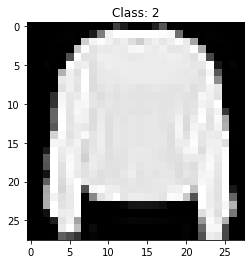

In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import FashionMNIST

# Load the Fashion MNIST dataset
dataset = FashionMNIST(root='dataset/', download=True)

# Get the data and target for the horse image
data = dataset.data[7].unsqueeze(0)
target = dataset.targets[7].item()

# Plot the image
plt.imshow(data[0], cmap='gray')
plt.title(f'Class: {target}')
plt.show()


In [2]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load the pre-trained resnet18 model
model = models.resnet18(pretrained=True)

# Define the image preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the image file
img = Image.open("horse.jpg")

# Preprocess the image
img_tensor = preprocess(img).unsqueeze(0)

# Use the model to make a prediction on the image
with torch.no_grad():
    output = model(img_tensor)
    prediction = output.argmax().item()

# Plot the image
plt.imshow(img)
plt.title(f'Prediction: {prediction}')
plt.show()


C:\Users\Owner\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Owner/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

NameError: name 'Image' is not defined

In [4]:
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

# Load the COCO dataset
dataset = datasets.CocoDetection(root='path/to/COCO', annFile='path/to/annotations.json')

# Get the data and target for a horse image
img, target = dataset[3]

# Plot the image
plt.imshow(img)
plt.title(f'Class: {target["category_id"]}')
plt.show()


ModuleNotFoundError: No module named 'pycocotools'

TypeError: Invalid shape (3, 100, 100) for image data

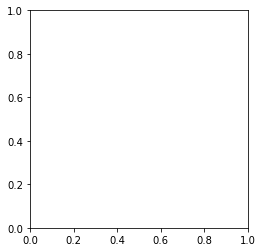

In [5]:
import torch
import matplotlib.pyplot as plt

# Create a random tensor of size (100, 100, 3)
image1 = torch.randn((100, 100, 3))

# Create a second random tensor of size (100, 100, 3)
image2 = torch.randn((100, 100, 3))

# Plot the first image
plt.imshow(image1.permute(2, 0, 1).numpy())
plt.show()

# Plot the second image
plt.imshow(image2.permute(2, 0, 1).numpy())
plt.show()


In [6]:
import torchvision.datasets as datasets

mnist_dataset = datasets.MNIST(root='path/to/mnist', download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting path/to/mnist\MNIST\raw\train-images-idx3-ubyte.gz to path/to/mnist\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting path/to/mnist\MNIST\raw\train-labels-idx1-ubyte.gz to path/to/mnist\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting path/to/mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to path/to/mnist\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting path/to/mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to path/to/mnist\MNIST\raw



In [7]:
cifar10_dataset = datasets.CIFAR10(root='path/to/cifar10', download=True)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting path/to/cifar10\cifar-10-python.tar.gz to path/to/cifar10


In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define a simple convolutional neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Define a loss function and an optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network on the CIFAR-10 dataset
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


NameError: name 'F' is not defined

In [9]:
class Piece:
    def __init__(self, color):
        self.color = color
        
    def __repr__(self):
        return self.color
        
class Pawn(Piece):
    def __init__(self, color):
        super().__init__(color)
        self.symbol = 'P'
        
    def __repr__(self):
        return self.color + self.symbol
        
class Knight(Piece):
    def __init__(self, color):
        super().__init__(color)
        self.symbol = 'N'
        
    def __repr__(self):
        return self.color + self.symbol
        
class Board:
    def __init__(self):
        self.grid = [[None for _ in range(8)] for _ in range(8)]
        self.populate()
        
    def populate(self):
        for i in range(8):
            self.grid[1][i] = Pawn('B')
            self.grid[6][i] = Pawn('W')
            
        self.grid[0][1] = Knight('B')
        self.grid[0][6] = Knight('B')
        self.grid[7][1] = Knight('W')
        self.grid[7][6] = Knight('W')
        
    def __repr__(self):
        rows = []
        for row in self.grid:
            current_row = []
            for piece in row:
                if piece is None:
                    current_row.append('-')
                else:
                    current_row.append(str(piece))
            rows.append(' '.join(current_row))
        return '\n'.join(rows)
        
board = Board()
print(board)


- BN - - - - BN -
BP BP BP BP BP BP BP BP
- - - - - - - -
- - - - - - - -
- - - - - - - -
- - - - - - - -
WP WP WP WP WP WP WP WP
- WN - - - - WN -


ValueError: operands could not be broadcast together with shapes (30,1) (7,4) 

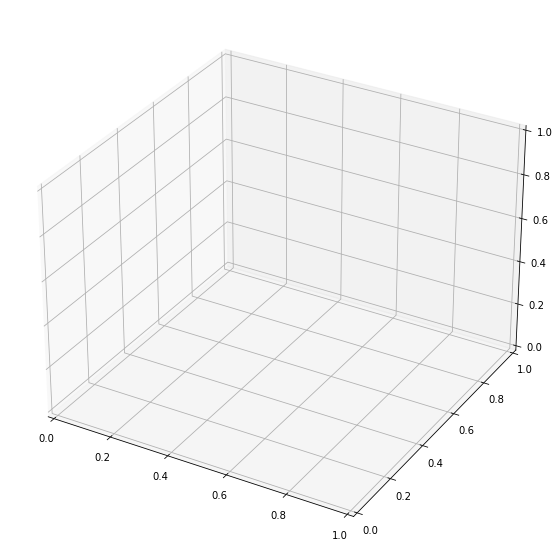

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sector_pie_chart(data, sector_names):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    x = [0]*len(data)
    y = [0]*len(data)
    z = data
    dx = [1]*len(data)
    dy = [1]*len(data)
    dz = [0]*len(data)

    ax.bar3d(x, y, z, dx, dy, dz, color=colors)
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_zticks(data)
    ax.set_xticklabels([''])
    ax.set_yticklabels([''])
    ax.set_zticklabels(data)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    plt.title("S&P 500 by sector")
    plt.legend(sector_names)
    plt.show()

data = [100, 150, 200, 75, 50]
sector_names = ['Technology', 'Healthcare', 'Financials', 'Consumer Discretionary', 'Industrials']
sector_pie_chart(data, sector_names)


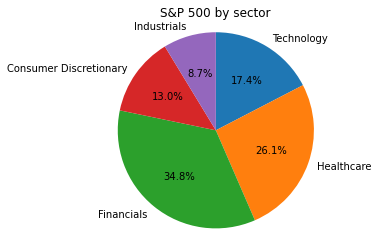

In [11]:
import matplotlib.pyplot as plt

def sector_pie_chart(data, sector_names):
    fig, ax = plt.subplots()
    ax.pie(data, labels=sector_names, startangle=90, counterclock=False, autopct='%1.1f%%')
    ax.axis('equal')
    plt.title("S&P 500 by sector")
    plt.show()

data = [100, 150, 200, 75, 50]
sector_names = ['Technology', 'Healthcare', 'Financials', 'Consumer Discretionary', 'Industrials']
sector_pie_chart(data, sector_names)



In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

def plot_globe():
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_axes([0.1,0.1,0.8,0.8],projection='mollweide')
    map = Basemap(projection='moll',lon_0=0,resolution='c')
    map.drawcoastlines()
    map.fillcontinents(color='coral',lake_color='aqua')
    map.drawmapboundary(fill_color='aqua')
    plt.title("Image of the Globe")
    plt.show()

plot_globe()



ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [13]:
conda install -c anaconda basemap



SyntaxError: invalid syntax (1916514257.py, line 1)

C:\Users\Owner\AppData\Local\Temp\ipykernel_1144\1321372448.py:9: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  earth = plt.imread("https://www.nasa.gov/centers/goddard/images/content/638831main_globe_east_2048.jpg")


SyntaxError: not a PNG file (<string>)

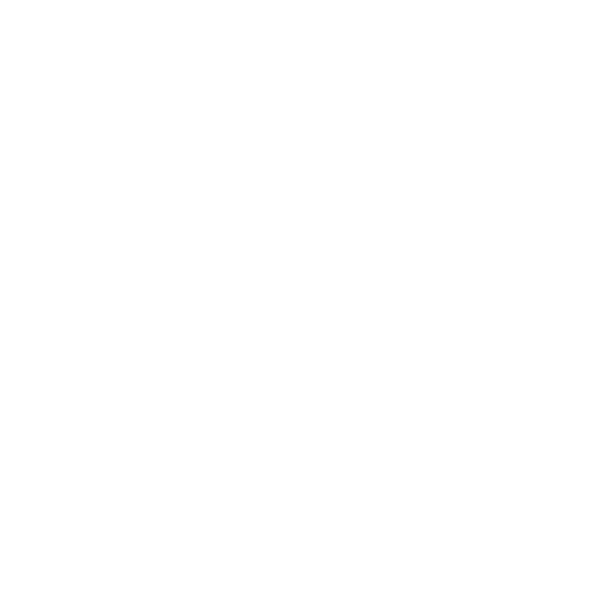

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_earth():
    fig = plt.figure(figsize=(8,8))
    ax = plt.Axes(fig, [0., 0., 1., 1.], )
    ax.set_axis_off()
    fig.add_axes(ax)
    earth = plt.imread("https://www.nasa.gov/centers/goddard/images/content/638831main_globe_east_2048.jpg")
    plt.imshow(earth)
    plt.axis('off')
    plt.show()

plot_earth()


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/earth_image.jpg'

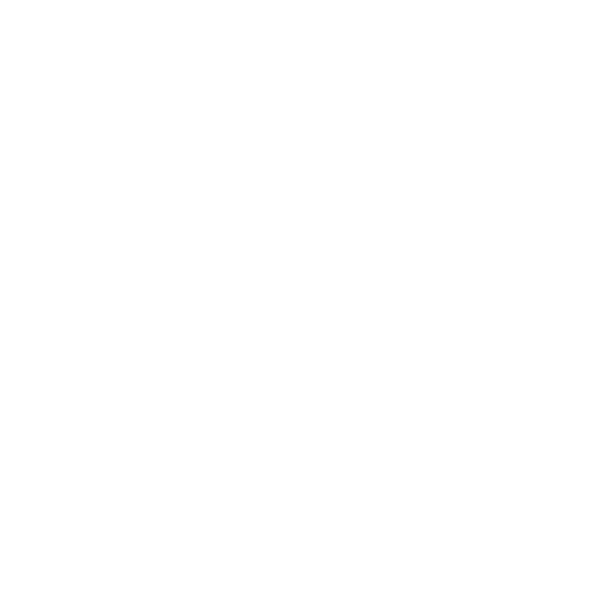

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_earth():
    fig = plt.figure(figsize=(8,8))
    ax = plt.Axes(fig, [0., 0., 1., 1.], )
    ax.set_axis_off()
    fig.add_axes(ax)
    earth = plt.imread("path/to/earth_image.jpg")
    plt.imshow(earth)
    plt.axis('off')
    plt.show()

plot_earth()


In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_earth():
    fig = plt.figure(figsize=(8,8))
    ax = plt.Axes(fig, [0., 0., 1., 1.], )
    ax.set_axis_off()
    fig.add_axes(ax)
    earth = plt.imread("C:\Users\Owner\Pictures\research\Earth.jpg")
    plt.imshow(earth)
    plt.axis('off')
    plt.show()

plot_earth()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3374121458.py, line 9)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_earth():
    fig = plt.figure(figsize=(8,8))
    ax = plt.Axes(fig, [0., 0., 1., 1.], )
    ax.set_axis_off()
    fig.add_axes(ax)
    earth = plt.imread("C:\Users\Owner\Pictures\research\Earth.jpg")
    plt.imshow(earth)
    plt.axis('off')
    plt.show()

plot_earth()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3374121458.py, line 9)

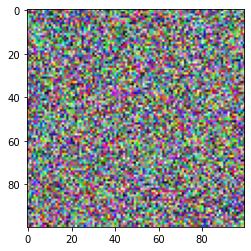

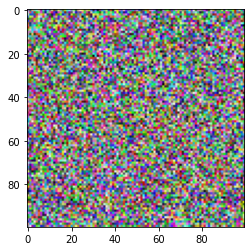

In [21]:
import torch
import matplotlib.pyplot as plt

# create a tensor with random pixel values
image = torch.rand((100,100,3))

# plot the image
plt.imshow(image)
plt.show()
import torch
import matplotlib.pyplot as plt

# create a tensor with random pixel values
image = torch.rand((100,100,3))

# plot the image
plt.imshow(image)
plt.show()


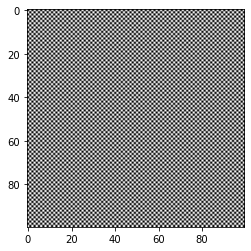

In [22]:
import torch
import matplotlib.pyplot as plt

# create a tensor with 0's and 1's
checkerboard = torch.zeros((100,100))
checkerboard[::2,1::2] = 1
checkerboard[1::2,::2] = 1

# plot the image
plt.imshow(checkerboard, cmap='gray')
plt.show()


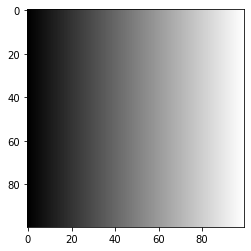

In [23]:
import torch
import matplotlib.pyplot as plt

# create a tensor with values ranging from 0 to 1
gradient = torch.linspace(0, 1, 100).repeat(100,1)

# plot the image
plt.imshow(gradient, cmap='gray')
plt.show()


In [24]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
from PIL import Image

# Load a pretrained model
vgg = models.vgg19(pretrained=True).features

# Freeze the model's parameters
for param in vgg.parameters():
    param.requires_grad_(False)

# Define a custom model
class StyleTransfer(nn.Module):
    def __init__(self, model):
        super(StyleTransfer, self).__init__()
        self.model = model
        
    def forward(self, x):
        features = []
        for name, layer in enumerate(self.model):
            x = layer(x)
            if name in [2, 7, 12, 21, 30]:
                features.append(x)
        return features

# Load content and style images
content = Image.open("content.jpg").convert("RGB")
style = Image.open("style.jpg").convert("RGB")

# Preprocess the images
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
content = transform(content).unsqueeze(0)
style = transform(style).unsqueeze(0)

# Initialize the model and target image
model = StyleTransfer(vgg)
target = content.clone().requires_grad_(True)

# Define a loss function
style_weights = [0.5, 1.0, 1.5, 3.0, 4.0]
content_weight = 1.0
style_losses = []
for f in model(style):
    style_losses.append(nn.MSELoss()(f, model(target)[f.shape[0]]))
style_loss = sum(style_weights[i] * loss for i, loss in enumerate(style_losses))
content_loss = nn.L1Loss()(model(content)[-1], model(target)[-1])
loss = content_weight * content_loss + style_loss

# Train the model
optimizer = optim.Adam([target], lr=0.003)
steps = 4000
for step in range(1, steps+1):
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(f"Step [{step}/{steps}], Content Loss: {content_loss.item()}, Style Loss: {style_loss.item()}")

# Save the final image
output = target.clone().squeeze(0)
output = transforms.ToPILImage()(output)
output.save("output.jpg")


C:\Users\Owner\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Owner/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

FileNotFoundError: [Errno 2] No such file or directory: 'content.jpg'

In [25]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
from PIL import Image
import os

# Load a pretrained model
vgg = models.vgg19(pretrained=True).features

# Freeze the model's parameters
for param in vgg.parameters():
    param.requires_grad_(False)

# Define a custom model
class StyleTransfer(nn.Module):
    def __init__(self, model):
        super(StyleTransfer, self).__init__()
        self.model = model
        
    def forward(self, x):
        features = []
        for name, layer in enumerate(self.model):
            x = layer(x)
            if name in [2, 7, 12, 21, 30]:
                features.append(x)
        return features

# Load content and style images
content_filename = "content.jpg"
style_filename = "style.jpg"

if not os.path.exists(content_filename):
    print("Error: content image not found.")
    exit()

if not os.path.exists(style_filename):
    print("Error: style image not found.")
    exit()

content = Image.open(content_filename).convert("RGB")
style = Image.open(style_filename).convert("RGB")

# Preprocess the images
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
content = transform(content).unsqueeze(0)
style = transform(style).unsqueeze(0)

# Initialize the model and target image
model = StyleTransfer(vgg)
target = content.clone().requires_grad_(True)

# Define a loss function
style_weights = [0.5, 1.0, 1.5, 3.0, 4.0]
content_weight = 1.0
style_losses = []
for f in model(style):
    style_losses.append(nn.MSELoss()(f, model(target)[f.shape[0]]))
style_loss = sum(style_weights[i] * loss for i, loss in enumerate(style_losses))
content_loss = nn.L1Loss()(model(content)[-1], model(target)[-1])
loss = content_weight * content_loss + style_loss

# Train the model
optimizer = optim.Adam([target], lr=0.003)
steps = 4000
for step in range(1, steps+1):
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(f"Step [{step}/{steps}], Content Loss: {content_loss.item()}, Style Loss: {style_loss.item()}")


Error: content image not found.
Error: style image not found.


FileNotFoundError: [Errno 2] No such file or directory: 'content.jpg'

In [1]:
#Training an Artificial Neural Network (ANN) classifier using the mean calcium event profiles across space as input to predict the label of each cell can be done using the following steps:

#Data preparation: Collect calcium imaging data for a set of cells and manually classify each cell as either "place" or "non-place." Next, calculate the mean calcium event profiles across space (of dendrites or somata) for each cell.

#Data preprocessing: Normalize the mean calcium event profiles to have zero mean and unit variance. Divide the data into training and testing sets.

#Model architecture: Choose the architecture of the ANN classifier, including the number of layers, the number of neurons in each layer, and the activation functions used in each layer. For example, a common architecture for a binary classification problem like this might be a feedforward neural network with a single hidden layer.

#Model training: Train the ANN classifier using the training set of mean calcium event profiles as input and the corresponding "place" or "non-place" labels as output. This involves optimizing the weights and biases of the network using an optimization algorithm such as stochastic gradient descent.

#Model evaluation: Evaluate the performance of the trained ANN classifier using the testing set of mean calcium event profiles as input and comparing the predicted labels to the true labels. Common metrics used to evaluate the performance of a binary classification model include accuracy, precision, recall, and F1 score.

#Model refinement: Adjust the hyperparameters of the ANN classifier and repeat steps 4 and 5 until the desired level of performance is achieved.

#Overall, training an ANN classifier to predict the label of each cell based on the mean calcium event profiles across space requires careful data preparation, preprocessing, model architecture selection, training, evaluation, and refinement. However, with the appropriate approach, this technique can be a powerful tool for analyzing neural activity and decoding spatial information in the brain.






import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Create synthetic data
X = torch.randn(100, 2)
y = torch.randint(low=0, high=2, size=(100, 1)).float()

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Initialize the neural network
net = SimpleNet()

# Define the loss function and optimization algorithm
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

# Train the neural network
for epoch in range(100):
    optimizer.zero_grad()
    output = net(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

# Evaluate the neural network
with torch.no_grad():
    y_pred = net(X_test)
    y_pred_class = torch.round(y_pred)
    accuracy = (y_pred_class == y_test).float().mean()

print("Accuracy:", accuracy.item())


Accuracy: 0.75


In [ ]:
#In the PyTorch example provided, the output is the value of the accuracy variable printed at the end of the script using the print() function. This output signifies the accuracy of the neural network classifier on the testing set of synthetic data.

#The accuracy value represents the fraction of correctly classified samples in the testing set, expressed as a decimal number between 0 and 1. For example, an accuracy of 0.8 would indicate that 80% of the samples in the testing set were classified correctly by the neural network.

#In this particular example, the output accuracy value indicates how well the neural network was able to learn the underlying patterns in the synthetic data and make accurate predictions on new, unseen data. If the accuracy is high, it suggests that the neural network was successful in learning the relationships between the input features and the binary labels, and could potentially generalize to other similar datasets. However, if the accuracy is low, it suggests that the neural network was not able to learn these relationships effectively and may require further optimization or modifications to the architecture.